In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import math
import numpy as np
import seaborn as sns
from windrose import WindroseAxes
import matplotlib.cm as cm


Wageningen, Netherlands
Coordinates

51.9812° N, 5.6584° E

Data: https://power.larc.nasa.gov/data-access-viewer/

MIT License: https://cran.r-project.org/web/packages/nasapower/nasapower.pdf

Data for 2020

In [2]:
place = "Wageningen, Netherlands"

file = "../data/wind speed and direction wageningen.csv"

df = pd.read_csv(file,
                skiprows = 10)

df["Datetime"] = pd.to_datetime(dict(year = df.YEAR,
                                     month = df.MO,
                                     day = df.DY,
                                     hour = df.HR))

df.set_index("Datetime", inplace = True)

df = df[["MO","WD50M","WS50M"]]

df.columns = ["Month","Direction","Speed"]

df

,Month,Direction,Speed
Datetime,,,
2020-01-01 00:00:00,1,152.07,4.84
2020-01-01 01:00:00,1,152.65,5.08
2020-01-01 02:00:00,1,152.53,5.30
2020-01-01 03:00:00,1,150.29,5.15
2020-01-01 04:00:00,1,148.27,4.89
...,...,...,...
2020-12-31 19:00:00,12,359.81,2.37
2020-12-31 20:00:00,12,343.64,2.05
2020-12-31 21:00:00,12,318.31,2.10


https://globalwindatlas.info/

In [3]:
print ("Minimum wind speed: ", df.Speed.min())
print ("Maximum wind speed: ", df.Speed.max())
print ("Median wind speed: ", df.Speed.median())
print ("Mean wind speed: ", df.Speed.mean())

Minimum wind speed:  0.05
Maximum wind speed:  24.77
Median wind speed:  6.985
Mean wind speed:  7.2239845173041894


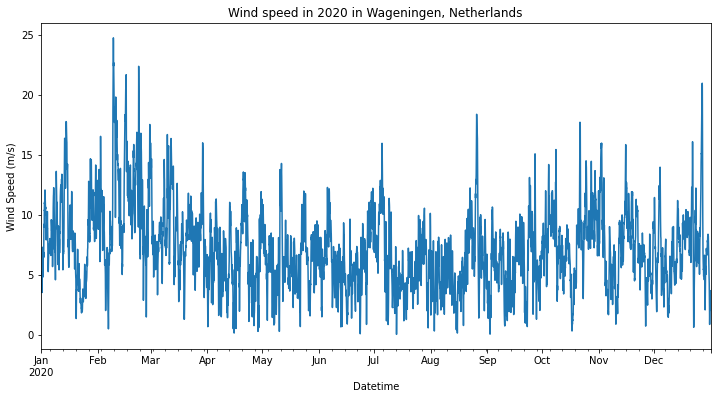

In [4]:
df["Speed"].plot(figsize = (12, 6))
#plt.rcParams["font.size"] = 18
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Wind speed in 2020 in {place}")

plt.savefig("../output/wind speed in Wageningen in 2020.jpeg",
           dpi = 300)
plt.show()



In [5]:
df.describe()

,Month,Direction,Speed
count,8784.000000,8784.000000,8784.000000
mean,6.513661,193.343901,7.223985
std,3.451430,88.729581,3.401610
min,1.000000,-0.000000,0.050000
25%,4.000000,130.035000,4.850000
50%,7.000000,212.705000,6.985000
75%,10.000000,254.135000,9.040000
max,12.000000,359.910000,24.770000


Average wind speed does not determine the energy yield. It's the product of wind speed and its corresponding frequency that determines it.

Text(0, 0.5, 'Wind Speed (m/s)')

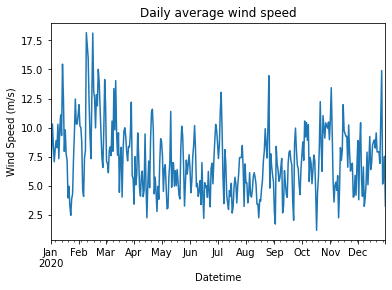

In [6]:
df.resample("D")["Speed"].mean().plot()
plt.title("Daily average wind speed")
plt.ylabel("Wind Speed (m/s)")

Text(0, 0.5, 'Wind Speed (m/s)')

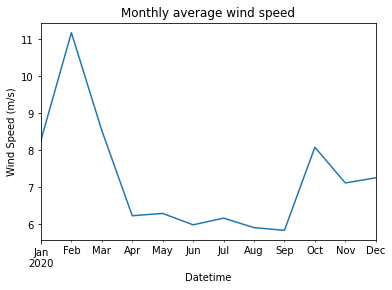

In [7]:
df.resample("M")["Speed"].mean().plot()
plt.title("Monthly average wind speed")
plt.ylabel("Wind Speed (m/s)")

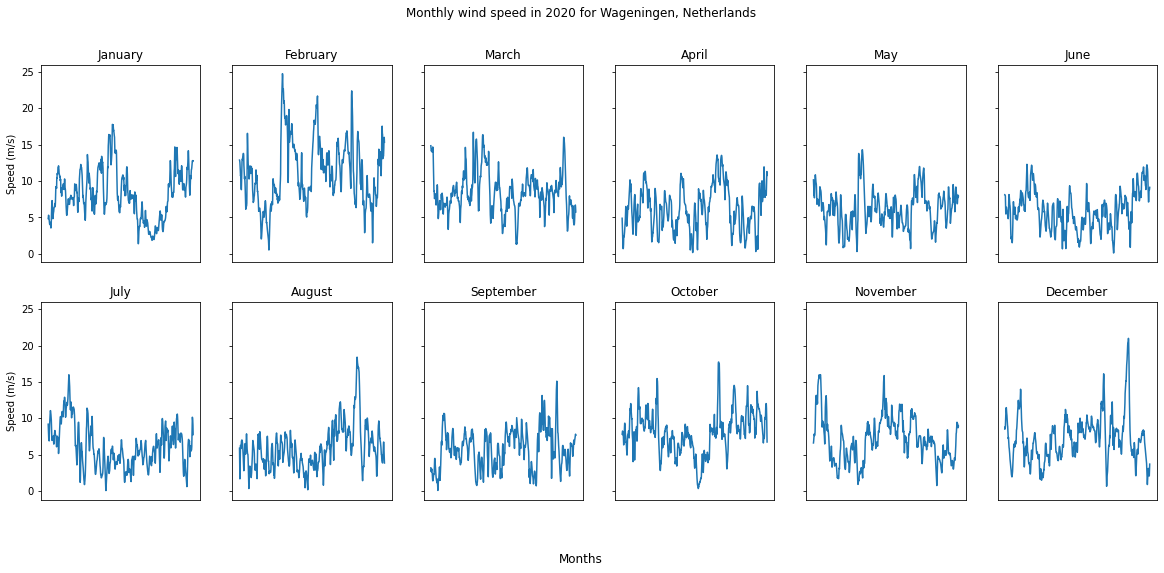

In [8]:
fig, ax = plt.subplots(2,6, sharey = True, figsize = (20, 8))
#plt.rcParams["font.size"] = 18

ax[0,0].plot(df[df.Month == 1]["Speed"])
ax[0,0].set_title("January")
ax[0,0].set_xticks([])

ax[0,1].plot(df[df.Month == 2]["Speed"])
ax[0,1].set_title("February")
ax[0,1].set_xticks([])

ax[0,2].plot(df[df.Month == 3]["Speed"])
ax[0,2].set_title("March")
ax[0,2].set_xticks([])

ax[0,3].plot(df[df.Month == 4]["Speed"])
ax[0,3].set_title("April")
ax[0,3].set_xticks([])

ax[0,4].plot(df[df.Month == 5]["Speed"])
ax[0,4].set_title("May")
ax[0,4].set_xticks([])

ax[0,5].plot(df[df.Month == 6]["Speed"])
ax[0,5].set_title("June")
ax[0,5].set_xticks([])

ax[1,0].plot(df[df.Month == 7]["Speed"])
ax[1,0].set_title("July")
ax[1,0].set_xticks([])

ax[1,1].plot(df[df.Month == 8]["Speed"])
ax[1,1].set_title("August")
ax[1,1].set_xticks([])

ax[1,2].plot(df[df.Month == 9]["Speed"])
ax[1,2].set_title("September")
ax[1,2].set_xticks([])

ax[1,3].plot(df[df.Month == 10]["Speed"])
ax[1,3].set_title("October")
ax[1,3].set_xticks([])

ax[1,4].plot(df[df.Month == 11]["Speed"])
ax[1,4].set_title("November")
ax[1,4].set_xticks([])

ax[1,5].plot(df[df.Month == 12]["Speed"])
ax[1,5].set_title("December")
ax[1,5].set_xticks([])

ax[0,0].set_ylabel("Speed (m/s)")
ax[1,0].set_ylabel("Speed (m/s)")

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

fig.suptitle(f"Monthly wind speed in 2020 for {place}")
fig.supxlabel("Months")

plt.savefig("../output/monthly wind speed in 2020 for wageninge.jpeg",
           dpi = 300)

plt.show()

# Weibull Distribution

https://wind-data.ch/tools/weibull.php

https://www.sciencedirect.com/science/article/pii/S1877705814029257

https://www.sciencedirect.com/science/article/pii/S2352484719308716

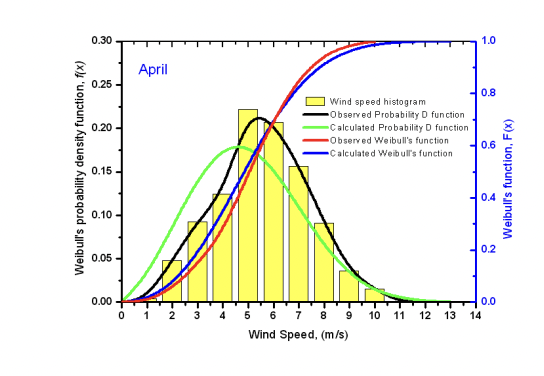

## Fitting a Weibull distribution using Scipy
https://stackoverflow.com/questions/17481672/fitting-a-weibull-distribution-using-scipy

In [9]:
from scipy import stats

data = df.Speed.values
data

array([4.84, 5.08, 5.3 , ..., 2.1 , 2.82, 3.69])

In [10]:
params = stats.weibull_min.fit(data,
                             floc = 0,     #Fix the location at zero
                             scale = 2    #keeps the first scale parameter of the exponential weibull fixed at once
                            )
params

(2.2297669965359512, 0, 8.151148665047671)

In [11]:
params

(2.2297669965359512, 0, 8.151148665047671)

In [12]:
shape_factor = params[0]
shape_factor

2.2297669965359512

In [13]:
scale_parameter = params[2]
scale_parameter

8.151148665047671

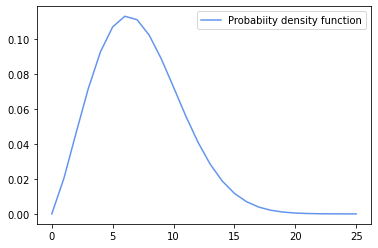

In [14]:
speed_range = np.arange(0, 26)

plt.plot(stats.weibull_min.pdf(speed_range, *params),
         color = "cornflowerblue",
        label = "Probabiity density function")

plt.legend()

plt.show()

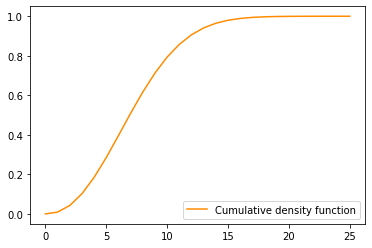

In [15]:
plt.plot(stats.weibull_min.cdf(speed_range, *params),
         color = "darkorange",
        label = "Cumulative density function")

plt.legend()

plt.show()

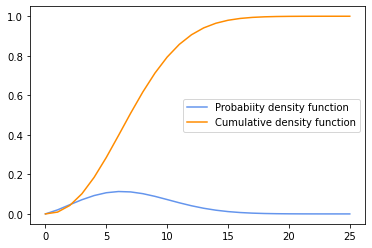

In [16]:
plt.plot(stats.weibull_min.pdf(speed_range, *params),
         color = "cornflowerblue",
        label = "Probabiity density function")

plt.plot(stats.weibull_min.cdf(speed_range, *params),
         color = "darkorange",
        label = "Cumulative density function")

plt.legend()

plt.show()

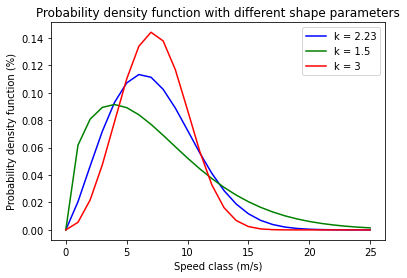

In [17]:
speed_range = np.arange(0, 26)

plt.plot(stats.weibull_min.pdf(speed_range, *params),
         color = "blue",
        label = "k = 2.23")   #shape factor

plt.plot(stats.weibull_min.pdf(speed_range, *(1.5, 0, 8.15)),
         color = "green",
        label = "k = 1.5")

plt.plot(stats.weibull_min.pdf(speed_range, *(3, 0, 8.15)),
        label = "k = 3",
        color = "red")

plt.xlabel("Speed class (m/s)")
plt.ylabel("Probability density function (%)")
plt.title("Probability density function with different shape parameters")
plt.legend()

plt.show()

https://www.homerenergy.com/products/pro/docs/latest/weibull_k_value.html

Typical value of shape factor varies between 1.5 and 2.5.
A gusty location could have shape parameter as low as 1.5, where the shape of the curve becomes broader as shown by green curve above.
A location with steady wind condition could have shape parameter as high as 3 to 4. The Weibull distribution curve becomes narrower as shown by the red curve.

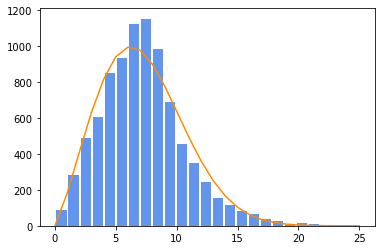

In [18]:
values, bins, hist = plt.hist(data,
                              bins = 25,
                             rwidth = 0.85,
                             color = "cornflowerblue"
                             )

speed_range = np.arange(0,26).tolist()

plt.plot(stats.weibull_min.pdf(speed_range, *params)*len(df),
         color = "darkorange",
        label = "Probability density function")

In [19]:
#Add empty new column
df["Speed Class"] = ""

for index in df.index:
    df.loc[index, "Speed Class"] = math.ceil(df.loc[index, "Speed"])
    
df

,Month,Direction,Speed,Speed Class
Datetime,,,,
2020-01-01 00:00:00,1,152.07,4.84,5
2020-01-01 01:00:00,1,152.65,5.08,6
2020-01-01 02:00:00,1,152.53,5.30,6
2020-01-01 03:00:00,1,150.29,5.15,6
2020-01-01 04:00:00,1,148.27,4.89,5
...,...,...,...,...
2020-12-31 19:00:00,12,359.81,2.37,3
2020-12-31 20:00:00,12,343.64,2.05,3
2020-12-31 21:00:00,12,318.31,2.10,3


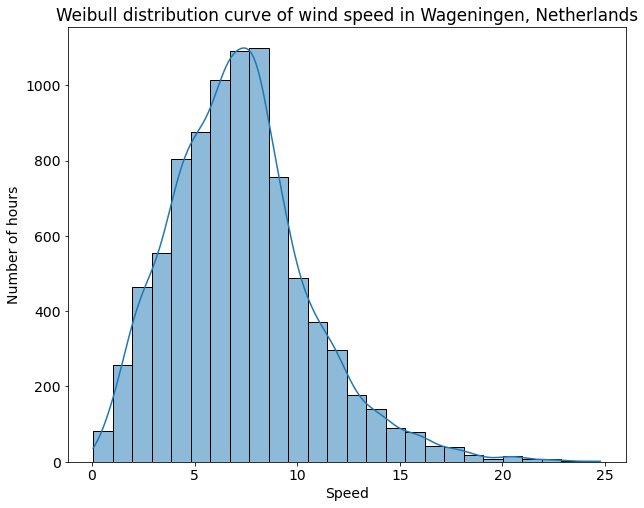

In [20]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 14

sns.histplot(data = df,  
            x = df.Speed,
            kde = True,    #kernel density estimate to smooth the distribution and show on the plot 
            bins = 26)

plt.ylabel("Number of hours")
plt.title(f"Weibull distribution curve of wind speed in {place}")

plt.savefig("../output/Weibull distribution curve based on given data for Wageningen",
           dpi = 300)
plt.show()

In [21]:
df_new = df.groupby(["Speed Class"]).count()
df_new = df_new[["Speed"]]
df_new.columns = ["Frequency"]

df_new["Cumulative Frequency"] = df_new["Frequency"].cumsum()


#df_new.loc[0] = [0,0]
df_new.sort_index(inplace = True)

df_new


,Frequency,Cumulative Frequency
Speed Class,,
1,82,82
2,279,361
3,498,859
4,612,1471
5,859,2330
6,940,3270
7,1139,4409
8,1165,5574
9,990,6564


plt.plot(df_new["Frequency"],
        color = "blue",
        label = "Weibull distribution")

plt.hist(df["Speed"],
         bins = 25,      #number of bars or classes
        rwidth = 0.85,    #width of bars
         edgecolor = "black",
         color = "cornflowerblue",
         label = "Wind Speed histogram"
        )

plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.legend()
plt.show()

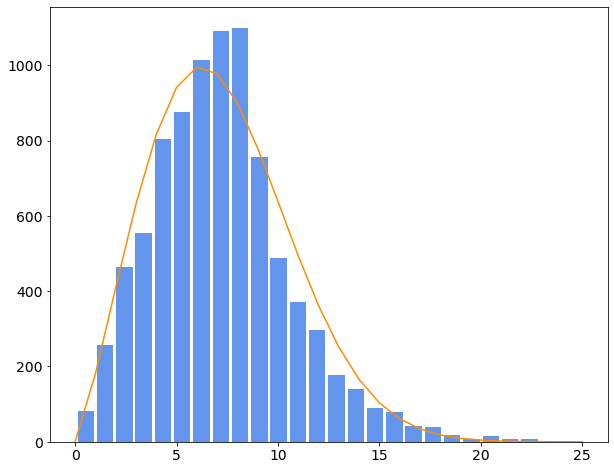

In [22]:
values, bins, hist = plt.hist(data,
                              bins = 26,
                             rwidth = 0.85,
                             color = "cornflowerblue"
                             )

speed_range = np.arange(0,26).tolist()

plt.plot(stats.weibull_min.pdf(speed_range, *params)*len(df),
         color = "darkorange",
        label = "Probability density function")

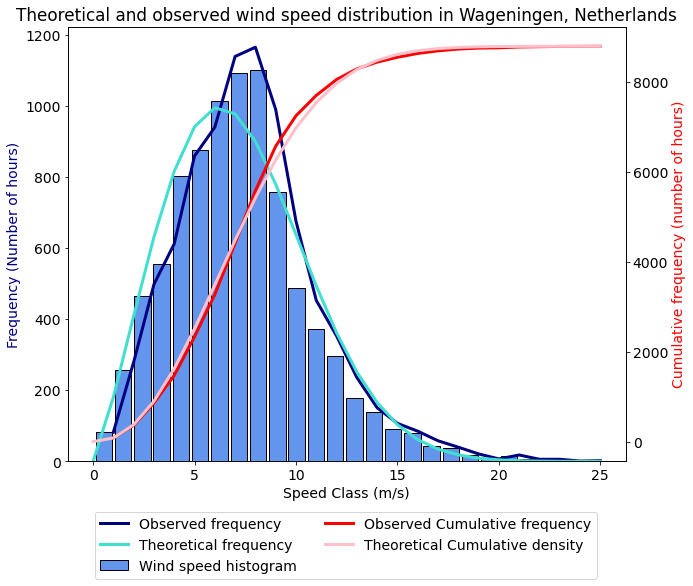

In [23]:
fig, ax = plt.subplots()

speed_range = np.arange(0, 26)

ax.plot(df_new["Frequency"],
        color = "navy",
        label = "Observed frequency",
        linewidth = 3
       )


ax.plot(stats.weibull_min.pdf(speed_range, *params)*len(df),
        color = "turquoise",
        label = "Theoretical frequency",
       linewidth = 3)

ax.hist(df["Speed"],
         bins = 26,      #number of bars or classes
        rwidth = 0.85,    #width of bars
         edgecolor = "black",
         color = "cornflowerblue",
        label = "Wind speed histogram"
        )

ax.set_ylabel("Frequency (Number of hours)", color = "navy")

ax2 = ax.twinx()

ax2.plot(df_new["Cumulative Frequency"],
        color = "red",
        label = "Observed Cumulative frequency",
        linewidth = 3)

ax2.set_ylabel("Cumulative frequency (number of hours)",
              color = "red",
              )

ax2.plot(stats.weibull_min.cdf(speed_range, *params)*len(df),
        color = "pink",
        label = "Theoretical Cumulative density",
        linewidth = 3)

ax.set_xlabel("Speed Class (m/s)")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, labels, ncol = 2, 
          bbox_to_anchor = (0.87, 0.05))

plt.title("Theoretical and observed wind speed distribution in Wageningen, Netherlands")
plt.savefig("../output/theoretical and observed wind speed distribution.jpeg",
           dpi = 300,
            bbox_extra_artists=(lgd,), bbox_inches='tight'
           )

plt.show()

# Wind Rose

<Figure size 576x432 with 0 Axes>

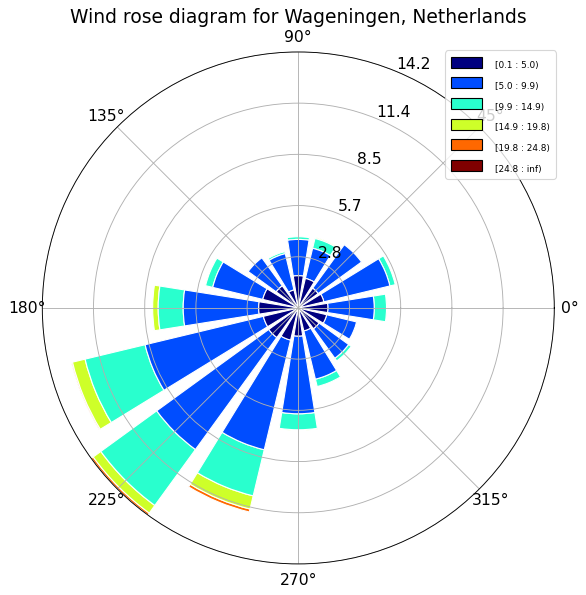

In [24]:
from windrose import WindroseAxes

plt.figure(figsize = (8, 6))
ax = WindroseAxes.from_ax()

ax.bar(df.Direction,
       df.Speed,
       normed=True,    #get % of number of hours
       opening= 0.8,    #width of bars
       edgecolor='white',
      )

ax.set_legend(loc = "best")

plt.title(f"Wind rose diagram for {place}")
plt.savefig("../output/wind rose diagram.jpeg",
           dpi = 300)

plt.show()

https://www.epa.gov/sites/default/files/2019-01/documents/how_to_read_a_wind_rose.pdf

Text(0.5, 1.0, 'Wind rose diagram for Wageningen, Netherlands')

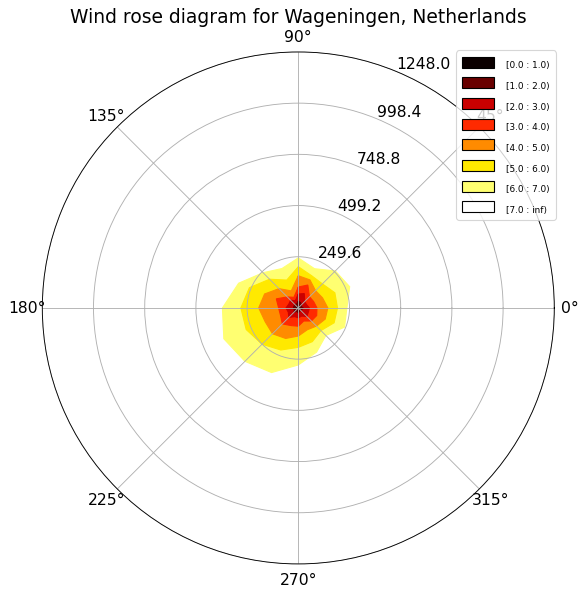

In [25]:
#Plot a windrose in filled mode
ax = WindroseAxes.from_ax()
ax.contourf(df.Direction, df.Speed, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend(loc = "best")
plt.title(f"Wind rose diagram for {place}")


# Overlaying on a map

Wageningen, Netherlands
Coordinates

51.9812° N, 5.6584° E


/var/folders/4g/2t29rb8s5x7_1q9qqm6lv8yc0000gn/T/ipykernel_44020/187013502.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/an

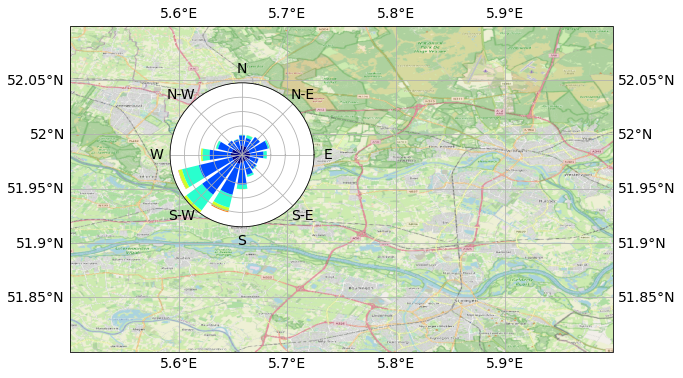

In [26]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import windrose

ws = df["Speed"].tolist()
wd = df["Direction"].tolist()

minlon, maxlon, minlat, maxlat = (5.5, 6, 51.8, 52.1)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 6))

# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()

request = cimgt.OSM()
main_ax.add_image(request, 12)

# Coordinates of the place we are measuring windspeed
wag_lon, wag_lat = (5.6584, 51.9812)

# Inset axe it with a fixed size
ax_sub = inset_axes(main_ax,
        width=2,                             # size in inches
        height=2,                            # size in inches
        loc='center',                        # center bbox at given position
        bbox_to_anchor=(wag_lon, wag_lat),   # position of the axe
        bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,    # specify the class of the axe
        )

ax_sub.bar(wd, ws)    #Plot wind direction and speed in wind rose diagram

for ax in [ax_sub]:
    ax.tick_params(labelleft=False,        #shows frequency of wind speed
                   labelbottom=True       #compass/direction
                  )

plt.savefig("../output/wind rose diagram in map.jpeg",
           dpi = 300)

# Power Curve

Data: https://openenergy-platform.org/dataedit/view/supply/wind_turbine_library

MIT License


http://www.xn--drmstrre-64ad.dk/wp-content/wind/miller/windpower%20web/en/tour/wres/pwr.htm

In [27]:
wind_speed = np.arange(1, 26).tolist()
wind_power = [0.0, 0.0, 5.0, 25.0, 60.0, 110.0, 180.0, 275.0, 400.0, 555.0, 671.0, 750.0, 790.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0, 810.0]

In [28]:
#Enercon E53/800
power_curve = pd.DataFrame({"Speed Class": wind_speed,
                           "Power at given speed":wind_power})

power_curve.set_index("Speed Class", inplace = True)

cut_in_speed = 3 
cut_out_speed = 25
rated_speed = 14
rated_power = 810

power_curve

,Power at given speed
Speed Class,
1,0.0
2,0.0
3,5.0
4,25.0
5,60.0
6,110.0
7,180.0
8,275.0
9,400.0


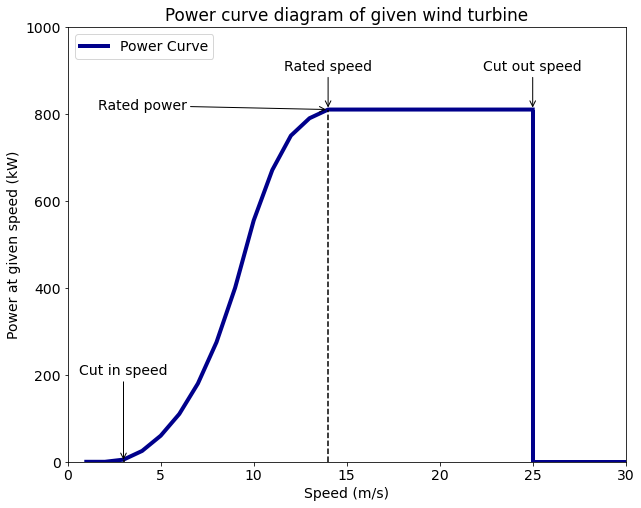

In [29]:
fig, ax = plt.subplots()

ax = power_curve["Power at given speed"].plot(color = "darkblue", linewidth = 4, label = "Power Curve")

ax.vlines(x = cut_in_speed,
          ymin = 0,
          ymax = power_curve.loc[cut_in_speed, "Power at given speed"],
          linestyle = "dashed",
          color = "black"
          )

ax.annotate("Cut in speed",
            xy=(cut_in_speed, 0), xycoords='data',
            xytext=(cut_in_speed, 200), textcoords='data',
            ha = "center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )


ax.vlines(x = rated_speed,
          ymin = 0,
          ymax = power_curve.loc[rated_speed, "Power at given speed"],
          linestyle = "dashed",
          color = "black"
          )

ax.annotate("Rated speed",
            xy=(rated_speed, rated_power), xycoords='data',
            xytext=(rated_speed, 900), textcoords='data',
            ha = "center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Rated power",
            xy=(rated_speed, rated_power), xycoords='data',
            xytext=(rated_speed - 10, rated_power), textcoords='data',
            ha = "center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


ax.vlines(x = cut_out_speed,
          ymin = 0,
          ymax = power_curve.loc[cut_out_speed, "Power at given speed"],
          color = "darkblue",
          linewidth = 4
         )

ax.hlines(y = 0,
          xmin = cut_out_speed,
          xmax = 30,
          color = "darkblue",
          linewidth = 4
         )

ax.annotate("Cut out speed",
            xy=(cut_out_speed, rated_power), xycoords='data',
            xytext=(cut_out_speed, 900), textcoords='data',
            ha = "center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.xlabel("Speed (m/s)")
plt.ylabel("Power at given speed (kW)")
plt.title("Power curve diagram of given wind turbine")

plt.xlim(0, 30)
plt.ylim(0, 1000)
plt.legend(loc = "upper left")
#plt.legend(bbox_to_anchor = (1.3, 1))
plt.savefig("../output/power curve.jpeg",
           dpi = 300)
plt.show()


https://wind-data.ch/tools/powercalc.php

In [30]:
power_curve["Hours"] = df_new.index.map(df_new["Frequency"])
power_curve["Frequency (%)"] = power_curve["Hours"]/power_curve["Hours"].sum()
power_curve["Power production distribution"] = power_curve["Frequency (%)"] * power_curve["Power at given speed"]/100
power_curve["Energy yield"] = power_curve["Power at given speed"] * power_curve["Hours"]
power_curve

,Power at given speed,Hours,Frequency (%),Power production distribution,Energy yield
Speed Class,,,,,
1,0.0,82,0.009335,0.000000,0.0
2,0.0,279,0.031762,0.000000,0.0
3,5.0,498,0.056694,0.002835,2490.0
4,25.0,612,0.069672,0.017418,15300.0
5,60.0,859,0.097791,0.058675,51540.0
6,110.0,940,0.107013,0.117714,103400.0
7,180.0,1139,0.129668,0.233402,205020.0
8,275.0,1165,0.132628,0.364726,320375.0
9,400.0,990,0.112705,0.450820,396000.0


In [31]:
power_curve["Hours"].sum()

8784

In [32]:
power_curve["Energy yield"].sum()

2631078.0

In [33]:
8784 * 810

7115040

In [34]:
2631/7115

0.36978215038650736

In [35]:
rated_power = 810

capacity_factor = power_curve["Energy yield"].sum() / (power_curve["Hours"].sum() * rated_power)
capacity_factor = round(capacity_factor, 2)

print (f"The capacity factor of the given wind turbine at {place} in 2020 was ", capacity_factor*100, "%.")

The capacity factor of the given wind turbine at Wageningen, Netherlands in 2020 was  37.0 %.


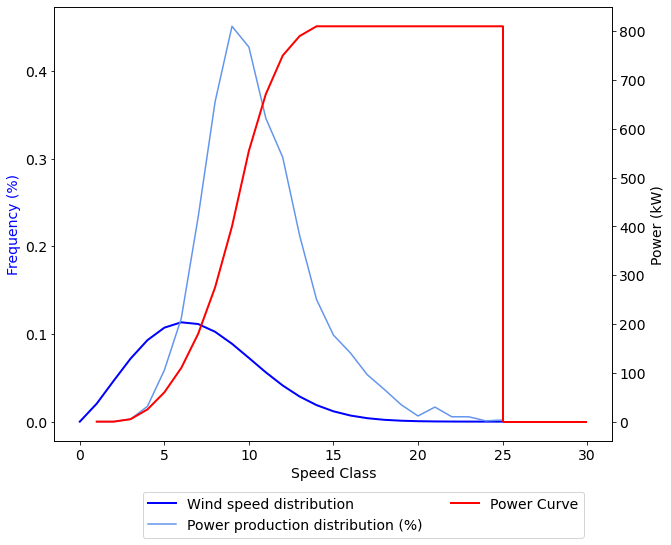

In [36]:
fig, ax = plt.subplots()

ax.plot(stats.weibull_min.pdf(speed_range, *params),
        color = "blue",
        label = "Wind speed distribution",
       linewidth = 2)

power_curve["Power production distribution"].plot(ax = ax,
                                                  color = "cornflowerblue",
                                                 label = "Power production distribution (%)")

ax.set_ylabel("Frequency (%)", color = "blue")

ax2 = ax.twinx()

ax2 = power_curve["Power at given speed"].plot(color = "red", linewidth = 2, label = "Power Curve")


ax2.vlines(x = cut_out_speed,
          ymin = 0,
          ymax = power_curve.loc[cut_out_speed, "Power at given speed"],
          color = "red",
          linewidth = 2
         )

ax2.hlines(y = 0,
          xmin = cut_out_speed,
          xmax = 30,
          color = "red",
          linewidth = 2
         )

ax2.set_ylabel("Power (kW)")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncol = 2, 
          bbox_to_anchor = (0.87, 0.05))

plt.show()